# 画像の表示

In [3]:
# urlから画像を取得
import urllib.request as req
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url,'test.pmg')

('test.pmg', <http.client.HTTPMessage at 0x7f391b3a4e50>)

In [8]:
## 画像の数値データを表示
import cv2
img = cv2.imread('/content/drive/MyDrive/ソシム本/AI 機械学習/test.pmg')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


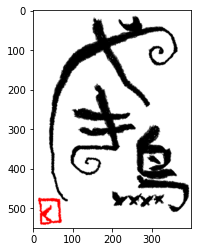

In [9]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# 顔検出

In [10]:
# カスケードファイルの読み込み
cascade_file = 'haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

In [21]:
img = cv2.imread('girl-gfd8e289fb_640.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [22]:
face_list = cascade.detectMultiScale(img_gray,minSize=(150,150))

234,99,185,185


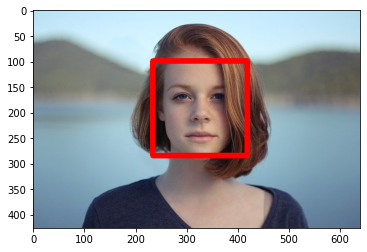

In [23]:
# x,y,w,hの座標を取得して顔の周りを囲む
for (x,y,w,h,) in face_list:
  print('{},{},{},{}'.format(x,y,w,h))
  red = (0,0,255)
  cv2.rectangle(img,(x,y),(x+w,y+h), red, thickness=10)

cv2.imwrite('face-detect.png',img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## モザイクをかける

In [24]:
## 関数を実装
def make_mosaic(img,rect,size):
  # モザイク部分を指定
  (x1,y1,x2,y2) = rect
  w = x2 -x1
  h = y2 -y1
  i_rect = img[y1:y2, x1:x2]
  # 画像をリサイズ
  i_small = cv2.resize(i_rect,(size,size))
  i_mos = cv2.resize(i_small,(w,h), interpolation=cv2.INTER_AREA)
  
  img2 = img.copy()
  img2[y1:y2,x1:x2] = i_mos
  return img2

In [31]:
mos = make_mosaic(img_gray,(200,100,400,300),10)

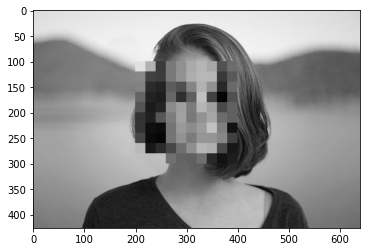

In [32]:
cv2.imwrite('mosaic.png',mos)
plt.imshow(mos,cmap='gray')
plt.show()

## モザイク部分を自動で検出

カスケードファイルと上記の関数を使い、自動で顔部分を検出してモザイクをかける

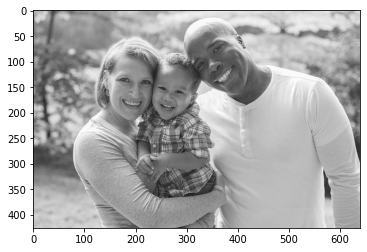

In [36]:
## 画像の読み込み,グレースケールに変換
img = cv2.imread('family.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [42]:
# 顔検出
face_list = cascade.detectMultiScale(img_gray,minSize=(30,30))

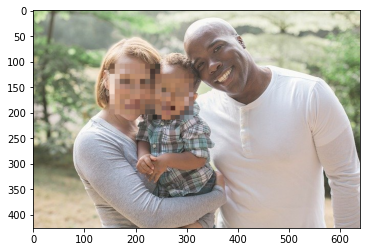

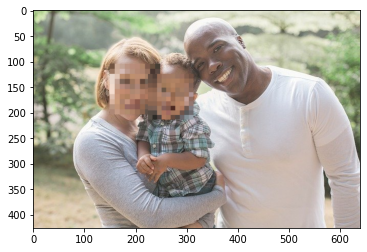

In [43]:
for (x,y,w,h) in face_list:
  img = make_mosaic(img, (x,y,x+w,y+h), 10)
  cv2.imwrite('family-mosaic.jpg',img)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  plt.show()

カスケードファイルで検出できるのは、あくまでも特徴の条件下のもの。斜めや横顔を検出する際には専用のカスケードファイルを読み込む必要あり